In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import linregress

---------------------------------

Price vs. Mortgage Rates 

---------------------------------

In [2]:
homesalesdf = pd.read_csv("../CSV_files/homes sales by zip by month_Project_wb.csv")
mortgagedf = pd.read_csv("../CSV_files/MortgageRateMonthlyHistory2.csv")
df1 = homesalesdf[['Median Listing Price']]
df2 = mortgagedf[['Rate']]

In [3]:
x_axis = np.arange(0,64,1)

MR = df2["Rate"].values

MLP_78702_df = df1[0:64]
MLP_78702 = MLP_78702_df["Median Listing Price"].values

MLP_78745_df = df1[65:129]
MLP_78745 = MLP_78745_df["Median Listing Price"].values

---------------------------------

Mortgage Rates Over Time

---------------------------------

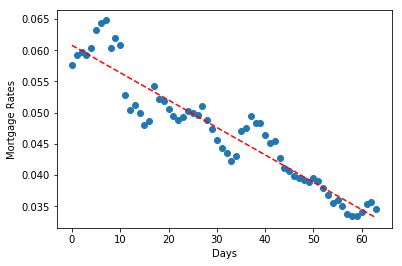

In [4]:
(slope_45, int_45, _, _, _) = linregress(x_axis, MR)
bestfit_45 = slope_45*x_axis+int_45
fig, ax=plt.subplots()
ax.set_ylabel("Mortgage Rates")
ax.set_xlabel("Days")
ax.plot(x_axis, MR, linewidth=0, marker='o')
ax.plot(x_axis, bestfit_45, 'r--')
plt.savefig("../Images/Mortgage Rates Over Time.png")

---------------------------------

Median Listing Price over Mortgage Rates (78702)

---------------------------------

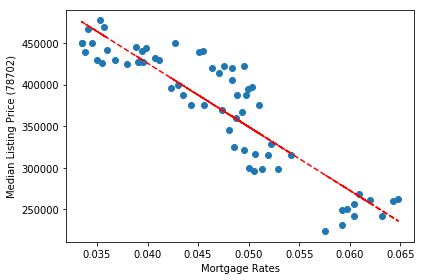

In [21]:
(slope_02, int_02, _, _, _) = linregress(MR, MLP_78702)
bestfit_02 = slope_02*MR+int_02
fig, ax=plt.subplots()
ax.set_ylabel("Median Listing Price (78702)")
ax.set_xlabel("Mortgage Rates")
ax.plot(MR, MLP_78702, linewidth=0, marker='o')
ax.plot(MR, bestfit_02, 'r--')
plt.tight_layout()
plt.savefig("../Images/78702 Median Listing Price.png")

---------------------------------

Median Listing Price over Mortgage Rates (78745)

---------------------------------

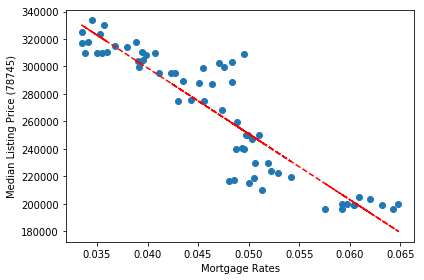

In [22]:
(slope_02, int_02, _, _, _) = linregress(MR, MLP_78745)
bestfit_02 = slope_02*MR+int_02
fig, ax=plt.subplots()
ax.set_ylabel("Median Listing Price (78745)")
ax.set_xlabel("Mortgage Rates")
ax.plot(MR, MLP_78745, linewidth=0, marker='o')
ax.plot(MR, bestfit_02, 'r--')
plt.tight_layout()
plt.savefig("../Images/78745 Median Listing Price.png")

---------------------------------

Monthly Average Listing Price over Time (78702)

---------------------------------

In [7]:
Theresa_good_data = "../CSV_files/homes sales by zip by month_Project_wb.csv"
data_df = pd.read_csv(Theresa_good_data)
df = data_df[['Month','ZipCode', "Avg Listing Price"]]

In [8]:
x_axis = np.arange(0, 64, 1)
MP78702_df = df[0:64]
MP78702 = MP78702_df["Avg Listing Price"].values

MP78745_df = df[65:129]
MP78745 = MP78745_df["Avg Listing Price"].values

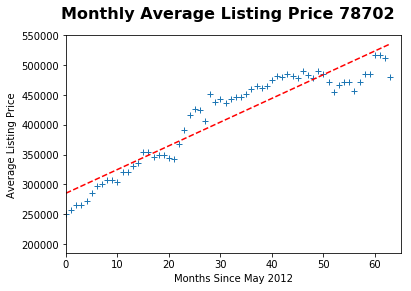

<Figure size 432x288 with 0 Axes>

In [27]:
(slope02, intercept02, _, _, _) = linregress(x_axis, MP78702)
fit02 = slope02 * x_axis + intercept02

fig, ax = plt.subplots()
fig.suptitle("Monthly Average Listing Price 78702", fontsize=16, fontweight="bold")
ax.set_xlim(0, 65)
ax.set_ylim(185000, 550000)
ax.set_xlabel("Months Since May 2012")
ax.set_ylabel("Average Listing Price")
ax.plot(x_axis, MP78702, linewidth=0, marker='+')
ax.plot(x_axis, fit02, 'r--')
plt.show()
plt.savefig("../Images/78702 Monthly Average Listing Price.png")

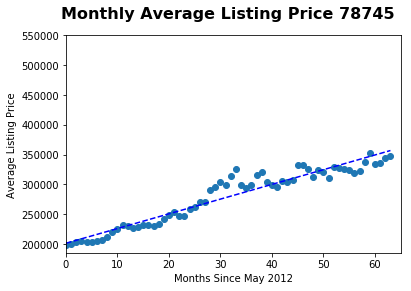

<Figure size 432x288 with 0 Axes>

In [28]:
(slope45, intercept45, _, _, _) = linregress(x_axis, MP78745)
fit45 = slope45 * x_axis + intercept45

fig, ax = plt.subplots()
fig.suptitle("Monthly Average Listing Price 78745", fontsize=16, fontweight="bold")
ax.set_xlim(0, 65)
ax.set_ylim(185000, 550000)
ax.set_xlabel("Months Since May 2012")
ax.set_ylabel("Average Listing Price")
ax.plot(x_axis, MP78745, linewidth=0, marker='o')
ax.plot(x_axis, fit45, 'b--')
plt.show()
plt.savefig("../Images/78745 Monthly Average Listing Price.png")

---------------------------------

Trendline Comparison

---------------------------------

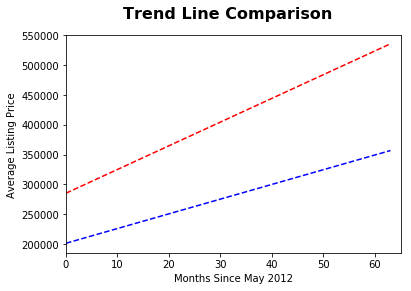

<Figure size 432x288 with 0 Axes>

In [29]:
fig, ax = plt.subplots()
fig.suptitle("Trend Line Comparison", fontsize=16, fontweight="bold")
ax.set_xlim(0, 65)
ax.set_ylim(185000, 550000)
ax.set_xlabel("Months Since May 2012")
ax.set_ylabel("Average Listing Price")
ax.plot(x_axis, fit02, 'r--')
ax.plot(x_axis, fit45, 'b--')
plt.show()
plt.savefig("../Images/Trend Line Comparison.png")

In [12]:
f"The slope of 78702 is {slope02} and the intercept is {intercept02}."

'The slope of 78702 is 3980.739468864469 and the intercept is 285048.89423076925.'

In [13]:
f"The slope of 78745 is {slope45} and the intercept is {intercept45}."

'The slope of 78745 is 2470.242673992674 and the intercept is 201040.48076923075.'

---------------------------

Construction Trending -- Historical 

---------------------------

In [14]:
#Get csv data from API price per sq.ft Dataframe 

df = pd.read_csv("../CSV_files/ZillowData2.csv")

# Remove unwanted observations
df = df.drop(["property_size","last_sold_date","zestimate_amount","last_sold_price","Property Address","Geographic ID","Type","Property ID","Owner Name","zillow_id","Appraisel_Year","tax_year","tax_value"], axis=1)
df = df.loc[df["home_type"]== "SingleFamily",:]
df["Appraised Value"]=df["Appraised Value"].replace({'\$': '', ',': ''}, regex=True)
df["best_estimate_$perFt"] = df["best_estimate_$perFt"].dropna(how = 'any', axis = 0)
df = df[pd.notnull(df["bedrooms"])]
df = df[pd.notnull(df["bathrooms"])]
df = df[pd.notnull(df["best_estimate_$perFt"])]
df = df[pd.notnull(df["year_built"])]
df = df.loc[df["bedrooms"] > 0,:]
df = df.loc[df["bathrooms"] > 0,:]

# Fix Structural Errors 
df.reset_index(inplace=True)
df = df.drop(["index"], axis=1)
df["year_built"] = df["year_built"].astype(int)
df["home_size"] = df["home_size"].astype(int)

In [15]:
#Identify and Remove Sq Ft Outliers
sort_sqft = df.sort_values("best_estimate_$perFt", ascending = False)

sqft = sort_sqft["best_estimate_$perFt"].tolist()

Q1,Q3 = np.percentile(sqft,[25,75])
iqr = Q3 - Q1
lower_limit = Q1 - (1.5 * iqr)
upper_limit = Q3 + (1.5 * iqr)

sort_sqft = sort_sqft.loc[sort_sqft["best_estimate_$perFt"] <= upper_limit,:]
sort_sqft = sort_sqft.loc[sort_sqft["best_estimate_$perFt"] >= lower_limit,:]

zipdf = sort_sqft.groupby(["Zip"], as_index=False).agg({'best_estimate':'mean','best_estimate_$perFt': 'mean'})

In [16]:
# Bin Years Built
sort_yr = sort_sqft.sort_values("year_built", ascending = False)

bins = [0,1919,1940,1960,1980,2000,2020]
timeframes = ["Pre 1920's","1920-1940","1941-1960","1961-1980","1981-2000","2000-Present"]

sort_yr["Built Timeframe"] = pd.cut(sort_yr["year_built"],bins, labels=timeframes)

sizeyr2 = sort_yr.groupby(["Zip","Built Timeframe"], as_index=False).agg({'year_built' : 'count','home_size':'mean','best_estimate_$perFt': 'mean','best_estimate':'mean'})

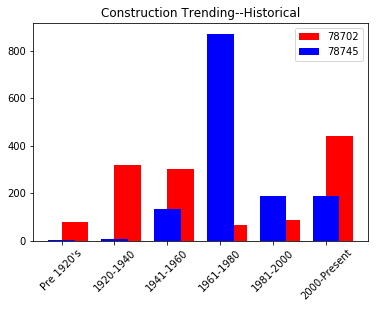

<Figure size 1440x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
age = sizeyr2.drop(["home_size","best_estimate_$perFt",'best_estimate'], axis=1)
df78702 = age.loc[age["Zip"]== 78702,:]
df78745 = age.loc[age["Zip"]== 78745,:]

built02 = df78702['year_built'].tolist()
built45 = df78745['year_built'].tolist()

x1 = age["Built Timeframe"].unique()
x_Axis = x1.tolist()

plt.bar(x_Axis, built02, align='edge', color='r', label='78702', width = 0.5)
plt.bar(x_Axis, built45, align='center',  color='b', label='78745', width = 0.5)
plt.xticks(rotation=45)
plt.legend()
plt.title("Construction Trending--Historical")
plt.figure(figsize=(20,10))
plt.show()
plt.savefig("../Images/Construction Trending_Historical.png")

---------------------------------

Construction Trending -- Current

---------------------------------

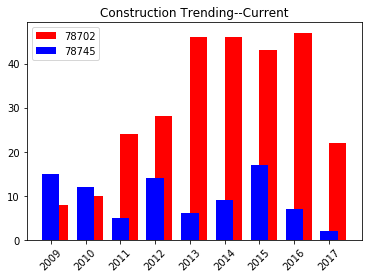

<Figure size 1440x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [18]:
current = sort_yr.loc[sort_yr["year_built"]>= 2009,:]
current = current.loc[current["year_built"]<= 2017,:]
c2 = current.copy()
c2["year_built"] = c2["year_built"].astype(int)
c2 = c2.sort_values("year_built", ascending = True)
current2 = c2.groupby(["Zip","year_built"], as_index=False).agg({'Built Timeframe' : 'count'})


current78702 = current2.loc[current2["Zip"]== 78702,:]
current78745 = current2.loc[current2["Zip"]== 78745,:]
current02 = current78702['Built Timeframe'].astype(int).tolist()
current45 = current78745['Built Timeframe'].astype(int).tolist()


X2 = current78702['year_built'].unique()
X_axis2 = X2.tolist()
X3 = current78745['year_built'].unique()
X_axis3 = X3.tolist()

plt.bar(X_axis2, current02, align='edge', color='r', label='78702', width = 0.5)
plt.bar(X_axis3, current45, align='center',color='b', label='78745', width = 0.5)
plt.xticks(X_axis2,rotation=45)
plt.legend()
plt.title("Construction Trending--Current")
plt.figure(figsize=(20,10))
plt.show()
plt.savefig("../Images/Construction Trending_Current.png")

---------------------------------

Mean Household Income

---------------------------------

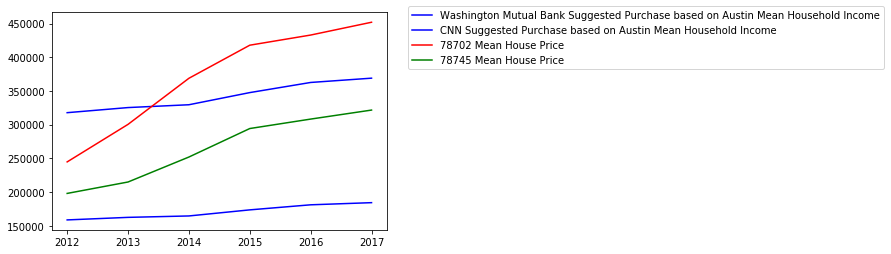

<Figure size 432x288 with 0 Axes>

In [30]:
incomesT = pd.read_csv("../CSV_files/IncomeZipCompare.csv")
incomesT = incomesT.replace({'\$': '', ',': ''}, regex=True)
incomesT = incomesT.apply(pd.to_numeric)
incomesT.head()

D2 = incomesT["Year"].tolist()
AUS2 = incomesT["Austin"].tolist()
zip78702_ = incomesT["zip_78702"].tolist()
zip78745_ = incomesT["zip_78745"].tolist()

Austin_HI2 = [ i * 5 for i in AUS2]
Austin_LO2 = [ i * 2.5 for i in AUS2]

plt.plot(D2,Austin_HI2, color='b', label="Washington Mutual Bank Suggested Purchase based on Austin Mean Household Income")
plt.plot(D2,Austin_LO2, color='b', label="CNN Suggested Purchase based on Austin Mean Household Income")
plt.plot(D2,zip78702_, color='r', label= "78702 Mean House Price")
plt.plot(D2,zip78745_, color = 'green', label="78745 Mean House Price")
plt.legend(loc="best", bbox_to_anchor=(1.05, 1.05))
plt.show()
plt.savefig("../Images/Mean Household Income.png")